# Neural Networks from scratch

In [1]:
!pip3 install matplotlib

In [2]:
from math import e
from typing import List, Callable
from random import random
from matplotlib import pyplot as plt

In [3]:
# Function to calculate the dot product
# See: https://en.wikipedia.org/wiki/Dot_product
def dot(a: List[float], b: List[float]) -> float:
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

assert dot([1, 2, 3, 4], [5, 6, 7, 8]) == 70

In [4]:
# The Step activation function
# See: https://en.wikipedia.org/wiki/Step_function
def step(x: float) -> int:
    return 0.0 if x < 0.0 else 1.0

assert step(-0.1) == 0.0
assert step(0.0) == 1.0
assert step(0.1) == 1.0

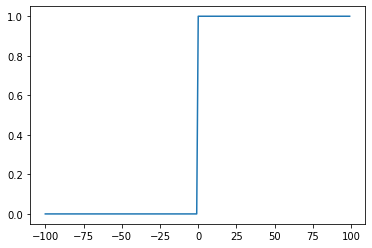

In [5]:
plt.plot([x for x in range(-100, 100)], [step(x) for x in range(-100, 100)]);

In [6]:
# The `Neuron` class represents a single Neuron / Perceptron
class Neuron:
    def __init__(self, activation: Callable) -> None:
        self._weights: List[float] = [random() for i in range(2)]
        self._bias: float = random()
        self._activation: Callable = activation
    
    def forward(self, x: List[float]) -> float:
        return self._activation(dot(x, self._weights) + self._bias)

    @property
    def weights(self) -> List[float]:
        return self._weights

    @property
    def bias(self) -> float:
        return self._bias

    @weights.setter
    def weights(self, weights: List[float]) -> None:
        self._weights: List[float] = weights
    
    @bias.setter
    def bias(self, bias: float) -> None:
        self._bias: float = bias

In [7]:
# Using a Perceptron to "learn" AND
# See: https://en.wikipedia.org/wiki/Logical_conjunction
x_1: List[float] = [0, 0]
x_2: List[float] = [0, 1]
x_3: List[float] = [1, 0]
x_4: List[float] = [1, 1]

y_1: float = 0.0
y_2: float = 0.0
y_3: float = 0.0
y_4: float = 1.0

# Creating a single `Neuron` (with a `step` activation function)
# and setting the weights and bias
perceptron_and: Neuron = Neuron(step)
perceptron_and.weights = [1.5, 1.5]
perceptron_and.bias = -2

assert perceptron_and.forward(x_1) == y_1
assert perceptron_and.forward(x_2) == y_2
assert perceptron_and.forward(x_3) == y_3
assert perceptron_and.forward(x_4) == y_4

In [8]:
# The Sigmoid activation function
# See: https://en.wikipedia.org/wiki/Sigmoid_function
def sigmoid(x: float) -> float:
    return 1 / (1 + (e ** -x))

assert sigmoid(0) == 0.5

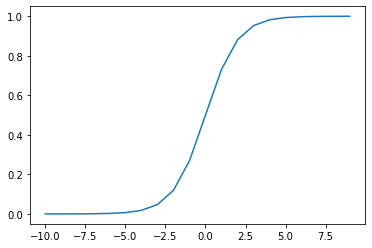

In [9]:
plt.plot([x for x in range(-10, 10)], [sigmoid(x) for x in range(-10, 10)]);

In [10]:
# The derivative of the Sigmoid activation function
def d_sigmoid(x: float) -> float:
    return sigmoid(x) * (1 - sigmoid(x))

assert d_sigmoid(0) == 0.25

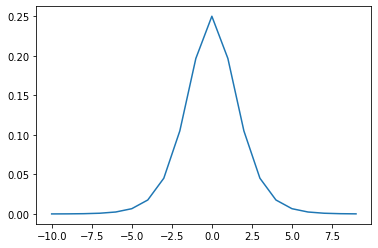

In [11]:
plt.plot([x for x in range(-10, 10)], [d_sigmoid(x) for x in range(-10, 10)]);

In [12]:
# Sum of squared errors function
# See: https://en.wikipedia.org/wiki/Residual_sum_of_squares
def sum_squared_error(ys: List[float], ys_pred: List[float]) -> float:
    return sum((y - y_pred) ** 2 for y, y_pred in zip(ys, ys_pred))

assert sum_squared_error([0, 1], [0, 1]) == 0
assert sum_squared_error([0, 0], [1, 1]) == 2

In [13]:
# Derivative of the squared error function
# NOTE: The squared error function is expressed as `(y - y_pred) ** 2`
def d_squared_error(y: float, y_pred: float) -> float:
    return -2 * (y - y_pred)

assert d_squared_error(1, 4) == 6
assert d_squared_error(1, 1) == 0

In [14]:
# Using a Perceptron to "learn" OR
# See: https://en.wikipedia.org/wiki/Logical_disjunction
xs: List[List[float]] = [[0, 0], [0, 1], [1, 0], [1, 1]]
ys: List[float] = [0, 1, 1, 1]

# Creating a single `Neuron` (with a `sigmoid` activation function)
perceptron_or: Neuron = Neuron(sigmoid)

# Print out what the randomized weights and bias initializations cause the Perceptron to predict
print('--- Before training ---')
print('Prediction for [0, 0] (should be 0): {num:.{digits}f}'.format(num=perceptron_or.forward([0, 0]), digits=2))
print('Prediction for [0, 1] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([0, 1]), digits=2))
print('Prediction for [1, 0] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([1, 0]), digits=2))
print('Prediction for [1, 1] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([1, 1]), digits=2))

# Train the Perceptron
epochs: int = 5000
learning_rate: int = 0.1

print(f'\nTraining Perceptron for {epochs} epochs with Learning Rate {learning_rate}\n')
    
for epoch in range(epochs):
    for x, y in zip(xs, ys):
        y_pred: float = perceptron_or.forward(x)

        d_error_d_y_pred: float = d_squared_error(y, y_pred)

        w1: float = perceptron_or.weights[0]
        w2: float = perceptron_or.weights[1]
        b: float = perceptron_or.bias

        sum_p: float = dot([x[0], x[1]], [w1, w2]) + b
        d_y_pred_d_w1: float = x[0] * d_sigmoid(sum_p)
        d_y_pred_d_w2: float = x[1] * d_sigmoid(sum_p)
        d_y_pred_d_b: float = d_sigmoid(sum_p)

        perceptron_or.weights[0] += -learning_rate * d_error_d_y_pred * d_y_pred_d_w1
        perceptron_or.weights[1] += -learning_rate * d_error_d_y_pred * d_y_pred_d_w2
        perceptron_or.bias += -learning_rate * d_error_d_y_pred * d_y_pred_d_b

# Print out what the Perceptron predicts after training (updating the weights and biases)
print('--- After training ---')
print('Prediction for [0, 0] (should be 0): {num:.{digits}f}'.format(num=perceptron_or.forward([0, 0]), digits=2))
print('Prediction for [0, 1] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([0, 1]), digits=2))
print('Prediction for [1, 0] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([1, 0]), digits=2))
print('Prediction for [1, 1] (should be 1): {num:.{digits}f}'.format(num=perceptron_or.forward([1, 1]), digits=2))

--- Before training ---
Prediction for [0, 0] (should be 0): 0.59
Prediction for [0, 1] (should be 1): 0.67
Prediction for [1, 0] (should be 1): 0.76
Prediction for [1, 1] (should be 1): 0.81

Training Perceptron for 5000 epochs with Learning Rate 0.1

--- After training ---
Prediction for [0, 0] (should be 0): 0.05
Prediction for [0, 1] (should be 1): 0.97
Prediction for [1, 0] (should be 1): 0.97
Prediction for [1, 1] (should be 1): 1.00


In [15]:
# Our 3 Layer (input, hidden, output) Neural Network
class NeuralNetwork:
    def __init__(self, activation: Callable):
        self._activation: Callable = activation
        # `Neuron`s of the hidden layer
        self._n1: Neuron = Neuron(self._activation)
        self._n2: Neuron = Neuron(self._activation)
        # `Neuron` of the output layer
        self._n3: Neuron = Neuron(self._activation)
        # The most recent x values we've seen
        self._x1: float = 0
        self._x2: float = 0
        # The results from the most recent forward-pass
        self._res_n1: float = 0
        self._res_n2: float = 0
        self._res_n3: float = 0

    # Forward-pass the data through the network
    def forward(self, x: List[float]) -> float:
        # Store a copy of the x values
        self._x1: float = x[0]
        self._x2: float = x[1]
        # Construct the data flow by combining the NN layers
        res_n1: float = self._n1.forward(x)
        res_n2: float = self._n2.forward(x)
        res_n3: float = self._n3.forward([res_n1, res_n2])
        # Store the most recent result of every single `Neuron`
        self._res_n1: float = res_n1
        self._res_n2: float = res_n2
        self._res_n3: float = res_n3
        # Return the overall result (the prediction)
        return res_n3

    # Back-propagating weight and bias updates across the network
    def backward(self, y: float, lr: float) -> None:
        # The most recent x values we've used
        x1: float = self._x1
        x2: float = self._x2
        
        # The individual `Neuron` results
        n1: float = self._res_n1
        n2: float = self._res_n2
        n3: float = self._res_n3
        y_pred: float = n3
        
        # The individual `Neuron`s weights and biases
        # `Neuron` 1
        b1: float = self._n1.bias
        w1: float = self._n1.weights[0]
        w2: float = self._n1.weights[1]
        # `Neuron` 2
        b2: float = self._n2.bias
        w3: float = self._n2.weights[0]
        w4: float = self._n2.weights[1]
        # `Neuron` 3 (output)
        b3: float = self._n3.bias
        w5: float = self._n3.weights[0]
        w6: float = self._n3.weights[1]

        # The partial derivative for the error function is used in every computation
        d_error_d_y_pred: float = d_squared_error(y, y_pred)
        
        # Calculate the partial derivatives for the individual weights and biases
        # `Neuron` 1
        sum_n1: float = dot([x1, x2], [w1, w2]) + b1
        d_n1_d_w1: float = x1 * d_sigmoid(sum_n1)
        d_n1_d_w2: float = x2 * d_sigmoid(sum_n1)
        d_n1_d_b1: float = d_sigmoid(sum_n1)
        # `Neuron` 2
        sum_n2: float = dot([x1, x2], [w3, w4]) + b2
        d_n2_d_w3: float = x1 * d_sigmoid(sum_n2)
        d_n2_d_w4: float = x2 * d_sigmoid(sum_n2)
        d_n2_d_b2: float = d_sigmoid(sum_n2)
        # `Neuron` 3 (output)
        sum_n3: float = dot([n1, n2], [w5, w6]) + b3
        d_y_pred_d_n1: float = w5 * d_sigmoid(sum_n3)
        d_y_pred_d_n2: float = w6 * d_sigmoid(sum_n3)
        d_y_pred_d_w5: float = n1 * d_sigmoid(sum_n3)
        d_y_pred_d_w6: float = n2 * d_sigmoid(sum_n3)
        d_y_pred_d_b3: float = d_sigmoid(sum_n3)

        # Update the weights and biases
        # `Neuron` 1
        self._n1.weights[0] += -lr * d_error_d_y_pred * d_y_pred_d_n1 * d_n1_d_w1
        self._n1.weights[1] += -lr * d_error_d_y_pred * d_y_pred_d_n1 * d_n1_d_w2
        self._n1.bias += -lr * d_error_d_y_pred * d_y_pred_d_n1 * d_n1_d_b1
        # `Neuron` 2
        self._n2.weights[0] += -lr * d_error_d_y_pred * d_y_pred_d_n2 * d_n2_d_w3
        self._n2.weights[1] += -lr * d_error_d_y_pred * d_y_pred_d_n2 * d_n2_d_w4
        self._n2.bias += -lr * d_error_d_y_pred * d_y_pred_d_n2 * d_n2_d_b2
        # `Neuron` 3 (output)
        self._n3.weights[0] += -lr * d_error_d_y_pred * d_y_pred_d_w5
        self._n3.weights[1] += -lr * d_error_d_y_pred * d_y_pred_d_w6
        self._n3.bias += -lr * d_error_d_y_pred * d_y_pred_d_b3

In [16]:
# Create a new Neural Network with a `sigmoid` activation function
nn: NeuralNetwork = NeuralNetwork(sigmoid)

In [17]:
# Print out what the randomized weights and bias initializations cause the NN to predict
print('--- Before training ---')
print('Prediction for [0, 0] (should be 0): {num:.{digits}f}'.format(num=nn.forward([0, 0]), digits=2))
print('Prediction for [0, 1] (should be 1): {num:.{digits}f}'.format(num=nn.forward([0, 1]), digits=2))
print('Prediction for [1, 0] (should be 1): {num:.{digits}f}'.format(num=nn.forward([1, 0]), digits=2))
print('Prediction for [1, 1] (should be 0): {num:.{digits}f}'.format(num=nn.forward([1, 1]), digits=2))

--- Before training ---
Prediction for [0, 0] (should be 0): 0.79
Prediction for [0, 1] (should be 1): 0.83
Prediction for [1, 0] (should be 1): 0.83
Prediction for [1, 1] (should be 0): 0.85


In [18]:
# Train the Neural Network to learn the XOR function
# See: https://en.wikipedia.org/wiki/Exclusive_or

# XOR function data
xs: List[List[float]] = [[0, 0], [0, 1], [1, 0], [1, 1]]
ys: List[float] = [0, 1, 1, 0]

epochs: int = 30000
learning_rate: float = 0.1

# This list is used to record the loss at every epoch to plot it later on
losses: List[float] = []

# This list is used to record our current y predictions
ys_pred: List[float] = []

for epoch in range(epochs):
    # Show the NN the whole data set once
    for x, y in zip(xs, ys):
        # Let it make a prediction
        y_pred: float = nn.forward(x)
        # Record the prediction
        ys_pred.append(y_pred)
        # Do a backward-pass to update the weights and biases
        nn.backward(y, lr=learning_rate)

    # Calculate and record the loss for every epoch
    # so that we can plot it later on
    loss: float = sum_squared_error(ys, ys_pred)
    losses.append(loss)

    # Print the loss every once in a while
    if epoch % 5000 == 0:
        print(f'Epoch {epoch} --> loss: {loss}')

    # Clear the list of predictions after the NN has seen the whole data set
    ys_pred.clear()

Epoch 0 --> loss: 1.4036893181184023
Epoch 5000 --> loss: 0.014574431740830018
Epoch 10000 --> loss: 0.004078498610061902
Epoch 15000 --> loss: 0.0023138620933954145
Epoch 20000 --> loss: 0.0016032268987062385
Epoch 25000 --> loss: 0.001222352177475733


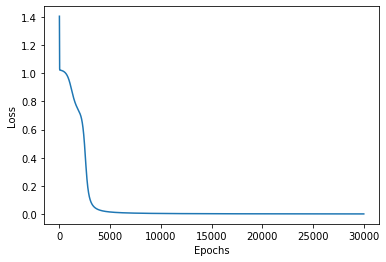

In [19]:
plt.plot([i for i in range(epochs)], losses)
plt.xlabel('Epochs')
plt.ylabel('Loss');

In [20]:
# Print out what the NN predicts after training (updating the weights and biases)
print('--- After training ---')
print('Prediction for [0, 0] (should be 0): {num:.{digits}f}'.format(num=nn.forward([0, 0]), digits=2))
print('Prediction for [0, 1] (should be 1): {num:.{digits}f}'.format(num=nn.forward([0, 1]), digits=2))
print('Prediction for [1, 0] (should be 1): {num:.{digits}f}'.format(num=nn.forward([1, 0]), digits=2))
print('Prediction for [1, 1] (should be 0): {num:.{digits}f}'.format(num=nn.forward([1, 1]), digits=2))

--- After training ---
Prediction for [0, 0] (should be 0): 0.02
Prediction for [0, 1] (should be 1): 0.99
Prediction for [1, 0] (should be 1): 0.99
Prediction for [1, 1] (should be 0): 0.02
